Dataset link :  https://data.cdc.gov/Behavioral-Risk-Factors/Behavioral-Risk-Factor-Surveillance-System-BRFSS-P/dttw-5yxu

Libraries and Packages used: pandas, matplotlib, seaborn, plotly

Software tools: Google Colab

# **Loading the data**

In [ ]:
import requests
import pandas as pd
from io import StringIO

# CDC CSV URL
csv_url = "https://data.cdc.gov/api/views/dttw-5yxu/rows.csv?accessType=DOWNLOAD"

# Read into pandas
df = pd.read_csv(csv_url)

print(df.head())


   Year Locationabbr Locationdesc                Class                Topic  \
0  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
1  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
2  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
3  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
4  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   

                                            Question Response Break_Out  \
0  Adults who have had at least one drink of alco...       No     18-24   
1  Adults who have had at least one drink of alco...      Yes     18-24   
2  Adults who have had at least one drink of alco...       No     25-34   
3  Adults who have had at least one drink of alco...      Yes     25-34   
4  Adults who have had at least one drink of alco...       No     35-44   

  Break_Out_Category  Sample_Size  ...  Data_Value_Footnote  DataSource  \

# **Data Exploration**

In [ ]:
# 1. Total no. of observations
df.shape

(2763102, 27)

In [ ]:
# 2a. Data distributions
df.describe()

,Year,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,LocationID
count,2.763102e+06,2.763102e+06,2.230768e+06,2.226536e+06,2.226536e+06,2.762508e+06,2.763102e+06
mean,2.017430e+03,6.391668e+02,4.044557e+01,3.710332e+01,4.379661e+01,7.912646e+02,3.089425e+01
std,3.606456e+00,1.357030e+03,3.323589e+01,3.300205e+01,3.370820e+01,1.251560e+03,1.774223e+01
min,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.014000e+03,3.300000e+01,1.070000e+01,8.000000e+00,1.320000e+01,1.000000e+00,1.700000e+01
50%,2.017000e+03,1.630000e+02,2.860000e+01,2.380000e+01,3.330000e+01,5.000000e+00,3.000000e+01
75%,2.021000e+03,6.150000e+02,7.360000e+01,6.890000e+01,7.830000e+01,1.390000e+03,4.500000e+01
max,2.023000e+03,3.749200e+04,1.000000e+02,1.000000e+02,1.000000e+02,4.493000e+03,9.900000e+01


In [ ]:
#2b. type of data
df.dtypes

,0
Year,int64
Locationabbr,object
Locationdesc,object
Class,object
Topic,object
Question,object
Response,object
Break_Out,object
Break_Out_Category,object
Sample_Size,int64


In [ ]:
# 2c. target column - Data value - predicting prevalance
# percantage of people in a specific group who reported a certain behavior or condition
df['Data_value'].describe()
df['Data_value'].mean()

# Example:
df[(df['Break_Out']=='18-24') & (df['Topic'].str.contains('alcohol',case=False))& (df['Year']==2016)& (df['Response'].str.contains('yes',case=False))&(df['Locationdesc']=='California')][['Locationdesc','Question','Data_value']]
# 49% of californians responded yes if they had alcohol in past month between the age of 18-24


,Locationdesc,Question,Data_value
17166,California,Adults who have had at least one drink of alco...,49.0


In [ ]:
# 3. Missing values
df.isna().sum()

,0
Year,0
Locationabbr,0
Locationdesc,0
Class,0
Topic,0
Question,0
Response,17621
Break_Out,0
Break_Out_Category,0
Sample_Size,0


# **Data Plots**

In [ ]:
# Dropping the unnecessary columns
df_cleaned = df.drop(columns=['Data_Value_Footnote_Symbol','Data_Value_Footnote','ClassId','TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID', 'QuestionID','ResponseID','GeoLocation','Data_value_type','DataSource','Data_value_unit'])

df_cleaned.head(5)

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order
0,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,95,55.0,45.8,64.3,1.0
1,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,80,45.0,35.7,54.2,1.0
2,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,108,33.6,25.5,41.7,1.0
3,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,188,66.4,58.3,74.5,1.0
4,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,35-44,Age Group,138,39.4,31.3,47.6,1.0


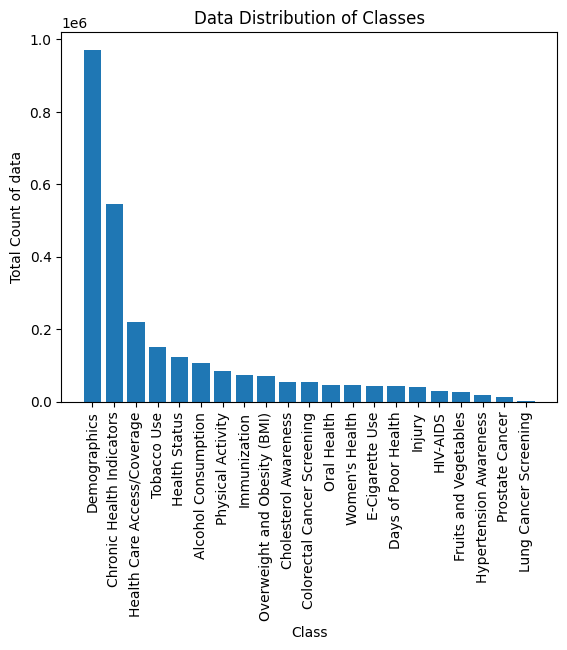

In [ ]:
# plotting Data distribution per Class

import matplotlib.pyplot as plt

df3 = df_cleaned.groupby(['Class'])['Class'].count().sort_values(ascending=False).reset_index(name='count')
plt.bar(df3['Class'],df3['count'])
plt.xticks(rotation=90)
plt.title('Data Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Total Count of data')
plt.show()

In [ ]:
# creating a cancer subset and dropping the NA values
df_cancer = df_cleaned[df_cleaned['Class'].str.contains('cancer',case=False)]
df_cancer = df_cancer.dropna(subset=['Data_value'])
df_cancer.shape

(49778, 14)

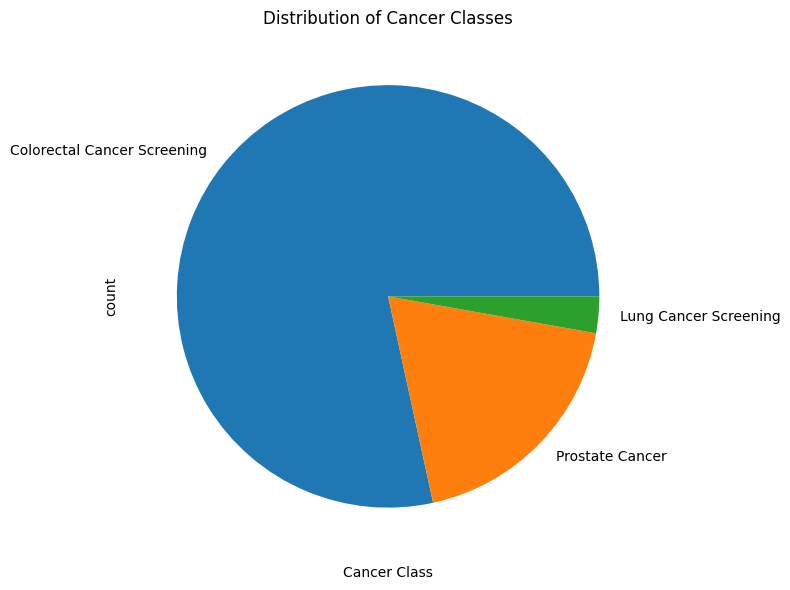

In [ ]:
# distribution of class counts in cancer dataset

class_counts = df_cancer['Class'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='pie')
plt.title("Distribution of Cancer Classes")
plt.xlabel("Cancer Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# creating filters in cancer dataset
Class = 'Colorectal Cancer Screening'
Topic = 'Blood Stool Test'
Question = 'Adults aged 50-75 who have had a blood stool test within the past year (variable calculated from one or more BRFSS questions)'
Break_Out_Category = 'Race/Ethnicity'

df_subset = df_cancer[(df['Class']==Class)&(df['Topic']==Topic)&(df['Question']==Question)&(df['Break_Out_Category']==Break_Out_Category)].sort_values('Year')
df_subset.shape

/tmp/ipython-input-1012963674.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(1352, 14)

In [ ]:
# plotting mean prevalance in filtered cancer data in plotly
import plotly.express as px

df_mean = df_subset.groupby(['Locationabbr','Year'])['Data_value'].mean().reset_index()
fig = px.choropleth(df_mean,
                    locations='Locationabbr',
                    locationmode='USA-states',
                    color='Data_value',
                    color_continuous_scale='Viridis',
                    range_color=(0,df['Data_value'].max()),
                    scope='usa',
                    animation_frame='Year',
                    labels={'Data_value':'Prevalance %'},
                    title = 'Colorectal Cancer Screening (Blood Stool Test, Age 50–75) by Race/Ethnicity'
                    )
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':0})
fig.show()